<a href="https://colab.research.google.com/github/umesh-pathak75/git-branch/blob/main/HEFT_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
n=random.randint(20, 80) #number of task
m=random.randint(5, 20) #number of providers
n=10
m=3
memory_capacity = [0]*m
computing_capacity = [0]*m
providers_cost = [0]*m
task_length = [0]*n
memory_consumption = [[0]*m]*n
computing_consumption = [[0]*m]*n
data = [[0]*n]*n
Ctt = 0.05
TR = 100
for i in range(m):
  memory_capacity[i] = random.randint(30, 100)
  computing_capacity[i] = random.randint(30, 100)
  providers_cost[i]= random.uniform(0.1, 1.0)
for i in range(n):
  task_length[i] = random.randint(300, 1000)
  for j in range(n):
    data[i][j] = random.randint(300, 1000)
  for j in range(m):
    memory_consumption[i][j]=random.randint(5, 30)
    computing_consumption[i][j] = random.randint(10, 30)
print(providers_cost)

[0.2739092042153258, 0.4913765191508269, 0.28533334431496216]


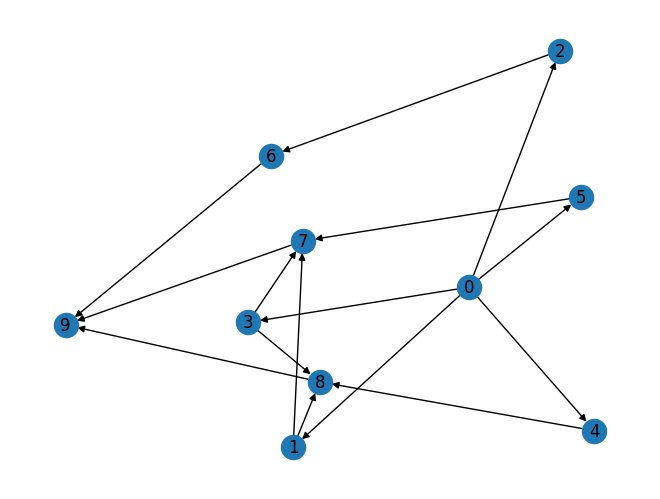

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import math
# generate a random DAG with n nodes
def generate_dag(n):
    G = nx.DiGraph()
    for i in range(n):
        G.add_node(i)
    G.add_edge(0, 1)   
    G.add_edge(0, 2)
    G.add_edge(0, 3)
    G.add_edge(0, 4)
    G.add_edge(0, 5)
    G.add_edge(1, 7)
    G.add_edge(1, 8)
    G.add_edge(2, 6)
    G.add_edge(3, 7)
    G.add_edge(3, 8)
    G.add_edge(4, 8)
    G.add_edge(5, 7)
    G.add_edge(6, 9)
    G.add_edge(7, 9)
    G.add_edge(8, 9)
    return G
# plot the DAG
def plot_dag(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()
# example usage
G = generate_dag(10)
plot_dag(G)

In [ ]:
Nodes= G.nodes
Edges= G.edges
processor=[0,1,2]
task = [0,3,2,1,4,5,8,6,7,9]

In [ ]:
# HFET algo
t =len(Nodes)
p= len(processor)
EFT = np.zeros(t)
Schedule=[0]*t
avail = np.zeros(p)
for i in task:
    EST = [0]*m
    cost = [0]*m
    Load = [0]*m
    temp_EFT = [0]*m
    DM = [0]*m
    for j in processor:
        x=[0]
        for l ,node in enumerate (list(G.predecessors(i))):
            a = EFT[node]
            if Schedule[node]==j:
                x.append(a)
            else:
                x.append(a+(data[i][node]/TR))
                cost[j]=cost[j]+(data[i][node]/TR)*Ctt
        EST[j]=max([avail[j],max(x)])
        temp_EFT[j] = task_length[i]/computing_capacity[j]+EST[j]
        cost[j] = cost[j] + (task_length[i]/computing_capacity[j])*providers_cost[j]
        Load[j] = ((memory_consumption[i][j]/memory_capacity[j])+(computing_consumption[i][j]/computing_capacity[j]))/2
        DM[j] = [temp_EFT[j],cost[j],Load[j]]
    for k in range(3):
      norm_denom=0
      for l in range(m):
        norm_denom = norm_denom + DM[l][k]*DM[l][k]
      norm_denom = math.sqrt(norm_denom)
      for l in range(m):
        DM[l][k] = 0.33*DM[l][k]/norm_denom
    pos = [0]*3
    neg = [0]*3
    for k in range(3):
      pos[k] = max([DM[l][k] for l in range(m)])
      neg[k] = min([DM[l][k] for l in range(m)])
    pos_dis = [0]*m
    neg_dis = [0]*m
    CI = [0]*m
    for k in range(m):
      pos_dis[k]=math.sqrt((DM[k][0]-pos[0])*(DM[k][0]-pos[0])+(DM[k][1]-pos[1])*(DM[k][1]-pos[1])+(DM[k][2]-pos[2])*(DM[k][2]-pos[2]))
      neg_dis[k]=math.sqrt((DM[k][0]-neg[0])*(DM[k][0]-neg[0])+(DM[k][1]-neg[1])*(DM[k][1]-neg[1])+(DM[k][2]-neg[2])*(DM[k][2]-neg[2]))
      CI[k] = pos_dis[k]/(pos_dis[k]+neg_dis[k])
    print(CI)
    min_value = min(CI)
    min_index = CI.index(min_value)
    EFT[i]=temp_EFT[min_index]
    Schedule[i]=min_index
    avail[k] = EFT[i]
    print(EFT,Schedule,avail)

[0.3780033592720568, 0.18203469923459806, 1.0]
[19.36734694  0.          0.          0.          0.          0.
  0.          0.          0.          0.        ] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] [ 0.          0.         19.36734694]
[0.4728642863752509, 0.161662629640332, 0.9913040737692598]
[19.36734694  0.          0.         27.26530612  0.          0.
  0.          0.          0.          0.        ] [1, 0, 0, 1, 0, 0, 0, 0, 0, 0] [ 0.          0.         27.26530612]
[0.47625122499295935, 0.15890279441691763, 0.9239766803191879]
[19.36734694  0.         30.44897959 27.26530612  0.          0.
  0.          0.          0.          0.        ] [1, 0, 1, 1, 0, 0, 0, 0, 0, 0] [ 0.          0.         30.44897959]
[0.47743360711974414, 0.15561831687136862, 0.8664712062658909]
[19.36734694 31.24489796 30.44897959 27.26530612  0.          0.
  0.          0.          0.          0.        ] [1, 1, 1, 1, 0, 0, 0, 0, 0, 0] [ 0.          0.         31.24489796]
[0.47862309398494923, 0.1606883